Q.Train a deep learning model to classify any handwritten letters from one of the Indian languages
A.I collected Marathi language Train dataset contain handwritten letter images. 

In [58]:
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpimage
from PIL import Image
import numpy as np
import os
import random
from sklearn import ensemble,preprocessing
import keras.utils.np_utils

Load images of handwritten letters of marathi language.

In [59]:
path = "C:/Users/Administrator/Desktop/HLD/Train_Full_Data/"
folders = os.listdir(path)
imageList=[]
imageMatrix=[]
newIm=[]
labels=[]
for folder in folders:
  newPath =path + folder
  folderName = os.path.split(os.path.abspath(newPath))[1]
  characterName = folderName.split("_")[2]
  imageList=[f for f in os.listdir(newPath) if os.path.splitext(f)]
  for image in imageList:
    im = Image.open(newPath+"//"+image)
    labels.append(characterName)
    imageArray=np.asarray(im.getdata())
    flattenendImageArray = imageArray.flatten()
    imageMatrix.append(flattenendImageArray)
print("Size of image matrix=",np.size(imageMatrix))

Size of image matrix= 62668800


Convert matrix to array


In [60]:
a=np.array(imageMatrix)
a
print(a.shape)

(61200, 1024)


Separate the features and labels of the images

In [61]:
n_samples = len(a)
X= a.reshape((n_samples,-1))
T= np.array(labels)
print('Features size= ',X.shape)
print('Labels size= ',T.shape)
print(T)


Features size=  (61200, 1024)
Labels size=  (61200,)
['yna' 'yna' 'yna' ... 'jha' 'jha' 'jha']


Onehot encoding

In [62]:
le=preprocessing.LabelEncoder()
le.fit(T)
T=le.transform(T)
T=keras.utils.np_utils.to_categorical(T)

In [63]:
le_name_mapping = dict(zip(le.classes_,le.transform(le.classes_)))
print(le_name_mapping)

{'adna': 0, 'ba': 1, 'bha': 2, 'cha': 3, 'chha': 4, 'chhya': 5, 'da': 6, 'daa': 7, 'dha': 8, 'dhaa': 9, 'ga': 10, 'gha': 11, 'gya': 12, 'ha': 13, 'ja': 14, 'jha': 15, 'ka': 16, 'kha': 17, 'kna': 18, 'la': 19, 'ma': 20, 'motosaw': 21, 'na': 22, 'pa': 23, 'patalosaw': 24, 'petchiryakha': 25, 'pha': 26, 'ra': 27, 'ta(tabala)': 28, 'ta(tomato)': 29, 'tha': 30, 'thaa': 31, 'tra': 32, 'waw': 33, 'yaw': 34, 'yna': 35}


Split the data into train and test tests (80% train and 20% test)

In [64]:
from sklearn.model_selection import train_test_split
X_train, X_test, T_train, T_test = train_test_split(X, T, test_size=0.2, random_state=34)

In [65]:
print('Train size = ',X_train.shape,"",T_train.shape)

Train size =  (48960, 1024)  (48960, 36)


In [86]:
import numpy as np
import keras
from keras import models, layers, losses, optimizers, metrics
from keras.utils import to_categorical
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout
from keras.models import Sequential
from tensorflow.keras.preprocessing import image


In [67]:
img_height_rows = 32
img_width_cols = 32

In [68]:
im_shape = (img_height_rows, img_width_cols, 1)
print(im_shape)
x_train= X_train.reshape(X_train.shape[0], *im_shape)
x_test = X_test.reshape(X_test.shape[0], *im_shape)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

(32, 32, 1)


In [69]:
im_shape = (img_height_rows, img_width_cols, 1)
print(im_shape)
x_train = X_train.reshape(X_train.shape[0], *im_shape) # Python TIP :the * operator unpacks the tuple
x_test = X_test.reshape(X_test.shape[0], *im_shape)

(32, 32, 1)


Train a classification model using Convolutional Neural Networks 

In [70]:
cnn= Sequential()
#1st layer
cnn.add(Conv2D(filters=8, kernel_size = (5,5), activation = 'relu', 
                 input_shape = (32,32,1)))
cnn.add(MaxPool2D(pool_size=(2,2)))
cnn.add(Dropout(0.25))

In [71]:
#2nd layer
cnn.add(Conv2D(filters = 8, kernel_size= (3,3),
                 activation='relu'))
cnn.add(MaxPool2D(pool_size=(2,2)))
cnn.add(Dropout(0.25))

In [72]:
cnn.add(Flatten(input_shape=(32,32,1)))
cnn.add(Dense(20, activation = 'relu'))
cnn.add(Dense(1024, activation = 'relu'))
# as we have 384 categories we have 384 output nodes
cnn.add(Dense(36, activation = 'softmax'))


In [73]:
cnn.summary(show_trainable=True)
cnn.compile(optimizer = "Adam", loss = 'categorical_crossentropy', 
              metrics=['accuracy'])


Model: "sequential_1"
____________________________________________________________________________
 Layer (type)                Output Shape              Param #   Trainable  
 conv2d_2 (Conv2D)           (None, 28, 28, 8)         208       Y          
                                                                            
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 8)        0         Y          
 2D)                                                                        
                                                                            
 dropout_2 (Dropout)         (None, 14, 14, 8)         0         Y          
                                                                            
 conv2d_3 (Conv2D)           (None, 12, 12, 8)         584       Y          
                                                                            
 max_pooling2d_3 (MaxPooling  (None, 6, 6, 8)          0         Y          
 2D)                                                  

In [74]:
history = cnn.fit(x_train, T_train, epochs = 10, batch_size=64,
                    validation_data= (x_test,T_test))

Epoch 1/10
765/765 [==============================] - 13s 16ms/step - loss: 2.8684 - accuracy: 0.2303 - val_loss: 1.1553 - val_accuracy: 0.6654
Epoch 2/10
765/765 [==============================] - 12s 15ms/step - loss: 1.1667 - accuracy: 0.6384 - val_loss: 0.6282 - val_accuracy: 0.8040
Epoch 3/10
765/765 [==============================] - 12s 15ms/step - loss: 0.8032 - accuracy: 0.7495 - val_loss: 0.4702 - val_accuracy: 0.8589
Epoch 4/10
765/765 [==============================] - 12s 15ms/step - loss: 0.6410 - accuracy: 0.7970 - val_loss: 0.3680 - val_accuracy: 0.8888
Epoch 5/10
765/765 [==============================] - 12s 15ms/step - loss: 0.5496 - accuracy: 0.8267 - val_loss: 0.3037 - val_accuracy: 0.9092
Epoch 6/10
765/765 [==============================] - 12s 15ms/step - loss: 0.4949 - accuracy: 0.8428 - val_loss: 0.2737 - val_accuracy: 0.9136
Epoch 7/10
765/765 [==============================] - 12s 16ms/step - loss: 0.4633 - accuracy: 0.8518 - val_loss: 0.2768 - val_accuracy:

In [75]:
scores = cnn.evaluate(x_test, T_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))


Accuracy: 92.68%


In [76]:
train_mse = cnn.evaluate(x_train, T_train, verbose="auto",use_multiprocessing=True)
test_mse =cnn.evaluate(x_test, T_test, verbose="auto",use_multiprocessing=True)

383/383 [==============================] - 1s 4ms/step - loss: 0.2326 - accuracy: 0.9268


Validate the model

(32, 32)
[[ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ... 94  0  0]
 ...
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]]


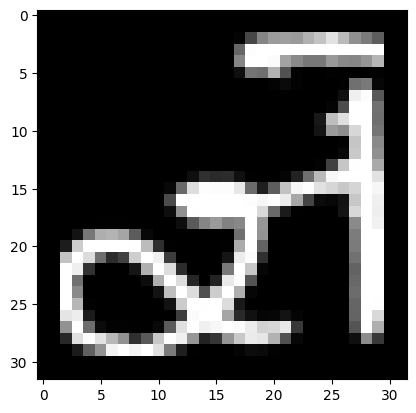

In [77]:
X_images = X_train.reshape((-1,32,32))
plt.imshow(X_images[7],cmap='gray')
print(X_images[7].shape)
print(X_images[7])
plt.show()


In [78]:
imgTrans =X_train[7].reshape(1,32,32,1)
predictions = cnn.predict([imgTrans])
classes=[np.argmax(predictions)]
classes
le.classes_[classes]
print("CNN Predicted:",*le.classes_[classes])

1/1 [==============================] - 0s 75ms/step
CNN Predicted: gya


In [79]:
import joblib

joblib.dump(cnn, "Handwritten_letter_classification_model.h5")
loaded_model = joblib.load('Handwritten_letter_classification_model.h5')

Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers\conv2d
......vars
.........0
.........1
...layers\conv2d_1
......vars
.........0
.........1
...layers\dense
......vars
.........0
.........1
...layers\dense_1
......vars
.........0
.........1
...layers\dense_2
......vars
.........0
.........1
...layers\dropout
......vars
...layers\dropout_1
......vars
...layers\flatten
......vars
...layers\max_pooling2d
......vars
...layers\max_pooling2d_1
......vars
...metrics\mean
......vars
.........0
.........1
...metrics\mean_metric_wrapper
......vars
.........0
.........1
...optimizer
......vars
.........0
.........1
.........10
.........11
.........12
.........13
.........14
.........15
.........16
.........17
.........18
.........19
.........2
.........20
.........3
.........4
.........5
.........6
.........7
.........8
.........9
...vars
Keras model archive saving:
File Name                                             Modified             Size
config.json              

Prediction using random handwritten image

(1, 32, 32, 1)
1/1 [==============================] - 0s 23ms/step
CNN Predicted: ka


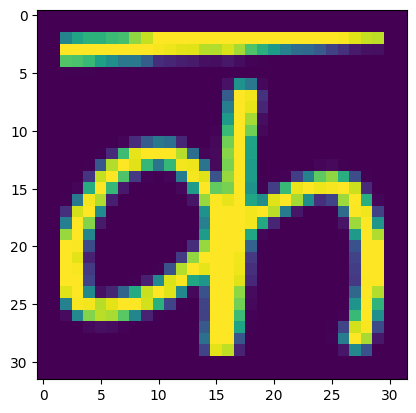

In [95]:
input_image = image.load_img(r"C:\Users\Administrator\Desktop\HLD\ka.png", color_mode = 'grayscale', target_size = (32, 32))
numerical_values_of_image = image.img_to_array(input_image)
expand_dimension = numerical_values_of_image
expand_dimension = np.expand_dims(numerical_values_of_image, axis = 0)
print(expand_dimension.shape)
plt.imshow(input_image)
predictions = cnn.predict([expand_dimension])
classes=[np.argmax(predictions)]               
print("CNN Predicted:",*le.classes_[classes])